# E1. Image Classification 모델 실습
## 1. 데이터 준비 및 탐색

In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.5.0
60000


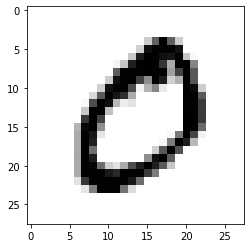

In [9]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [10]:
print(y_train[1])

0


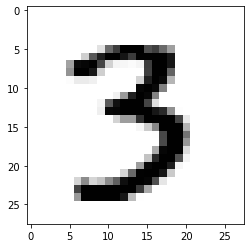

10001 번째 이미지의 숫자는 바로  3 입니다.


In [11]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

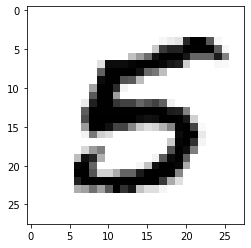

20001 번째 이미지의 숫자는 바로  5 입니다.


In [12]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=20000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [13]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [14]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 2. 딥러닝 네트워크 구현
### 2-1.  딥러닝 네트워크 설계

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [17]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


### 2-2. 딥러닝 네트워크 학습

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2059 - accuracy: 0.9367
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0677 - accuracy: 0.9788
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0475 - accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0363 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0296 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0246 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0200 - accuracy: 0.9938
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0168 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

### 2-3. 딥러닝 네트워크 성능 평가

In [19]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0403 - accuracy: 0.9870
test_loss: 0.04028134047985077 
test_accuracy: 0.9869999885559082


In [20]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.0584142e-12 9.9565280e-09 2.1467339e-09 6.0472182e-08 3.1668038e-12
 2.7636847e-12 7.9780970e-19 9.9999988e-01 5.8116296e-11 4.7753086e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


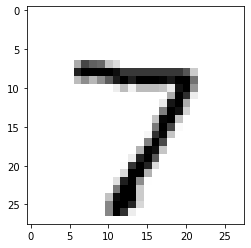

In [21]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.0830816e-08 8.2892448e-09 1.2892346e-05 3.8227478e-01 4.5164293e-06
 5.8639666e-06 3.7440957e-09 3.8348610e-08 6.1758924e-01 1.1254221e-04]
라벨: 3, 예측결과: 8


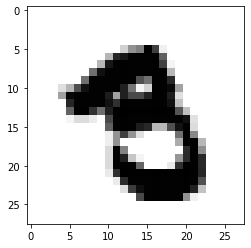

예측확률분포: [2.3461328e-09 3.4217299e-14 2.7524436e-14 1.6260338e-01 3.2787922e-10
 1.8005352e-01 4.1367434e-09 4.7769313e-11 6.4133757e-01 1.6005564e-02]
라벨: 5, 예측결과: 8


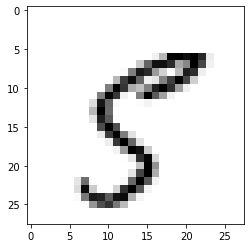

예측확률분포: [4.9015598e-13 7.4884570e-09 2.0571123e-01 2.6773822e-03 3.2441516e-15
 3.7457315e-14 1.1056273e-19 7.9146105e-01 1.5028719e-04 3.4695906e-11]
라벨: 2, 예측결과: 7


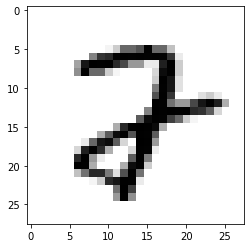

예측확률분포: [2.9160000e-07 1.2264291e-01 2.2356685e-03 1.7988708e-02 1.1677575e-02
 1.0980464e-06 2.1004451e-10 5.8301967e-01 1.8335784e-05 2.6241583e-01]
라벨: 9, 예측결과: 7


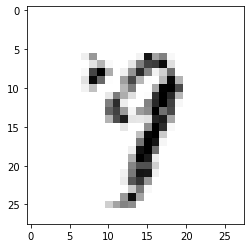

예측확률분포: [6.9983506e-01 7.8418580e-06 1.4958567e-02 2.0840906e-05 5.2128303e-08
 6.8688978e-12 2.2385138e-09 1.1120471e-05 2.8516597e-01 4.9875530e-07]
라벨: 8, 예측결과: 0


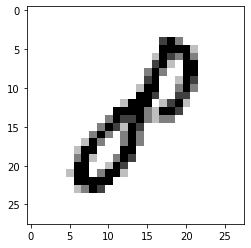

In [22]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 2-4. 딥러닝 네트워크 성능 개선

In [23]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               